# **지역별로 그리기**

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.offline as pyo

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv", encoding='utf-8-sig')
# print(df.head())

# 각 region별로 모델 훈련 및 시각화
for region, group in df.groupby('region'):
    reviews = group['reviews'].tolist()
    sentences = [gensim.utils.simple_preprocess(review) for review in reviews if isinstance(review, str)]

    if not sentences:  # 리뷰 데이터가 없는 경우 스킵
        continue

    # Word2Vec 모델 훈련
    # model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    model = Word2Vec(sentences, vector_size=50, window=3, min_count=100, workers=4)

    # 임베딩된 단어 벡터
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # PCA를 사용하여 3차원으로 축소
    pca = PCA(n_components=3)
    vectors_reduced = pca.fit_transform(vectors)

    # Plotly를 사용한 3차원 시각화
    fig = go.Figure(data=[go.Scatter3d(
        x=vectors_reduced[:, 0],
        y=vectors_reduced[:, 1],
        z=vectors_reduced[:, 2],
        mode='markers+text',
        text=words,
        marker=dict(
            size=5,
            color=np.random.rand(len(vectors_reduced)),  # 각 region 별로 색상 랜덤
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    # 시각화 레이아웃 설정
    fig.update_layout(title=f"Word2Vec Embeddings in 3D - {region}", margin=dict(l=0, r=0, b=0, t=30))

    # HTML 파일로 저장
    file_name = f'/content/sample_data/word2vec_{region}.html'
    pyo.plot(fig, filename=file_name, auto_open=False)

In [ ]:
from google.colab import files

# 파일 다운로드
files.download("/content/sample_data/word2vec_교촌치킨.html")
files.download("/content/sample_data/word2vec_60계치킨.html")
files.download("/content/sample_data/word2vec_BBQ치킨.html")
files.download("/content/sample_data/word2vec_BHC치킨.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **지역별로 그리기(불용어 표제어 추가)**

In [5]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.offline as pyo

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv", encoding='utf-8-sig')
# print(df.head())

# 불용어 및 표제어 처리 파일 로드
stopword_lemma_df = pd.read_csv("/content/sample_data/불용어_표제어처리.csv", encoding = 'utf-8-sig')

# 불용어 목록
stopwords = stopword_lemma_df[stopword_lemma_df['불용어'] == 'y']['단어'].tolist()
# 표제어 매핑
lemma_dict = stopword_lemma_df.dropna(subset=['dff']).set_index('단어')['dff'].to_dict()

# 모든 리뷰와 지역 정보를 사용하여 문장을 준비
sentences = []

# 각 region별로 모델 훈련 및 시각화
for region, group in df.groupby('region'):
    reviews = group['reviews'].tolist()
    print(type(reviews))
    print(reviews)
    # Concatenate all reviews in the 'reviews' column into a single string
    reviews_string = ' '.join(reviews)

    # 리뷰를 토큰화하고 불용어를 제거하며 표제어로 치환
    review_sentences = [lemma_dict.get(word, word) for word in gensim.utils.simple_preprocess(reviews_string) if word not in stopwords]
    sentences.append(review_sentences)

    if not sentences:  # 리뷰 데이터가 없는 경우 스킵
        continue

    # Word2Vec 모델 훈련
    # model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    model = Word2Vec(sentences, vector_size=100, window=3, min_count=30, workers=4)

    # 임베딩된 단어 벡터
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # PCA를 사용하여 3차원으로 축소
    pca = PCA(n_components=3)
    vectors_reduced = pca.fit_transform(vectors)

    # Plotly를 사용한 3차원 시각화
    fig = go.Figure(data=[go.Scatter3d(
        x=vectors_reduced[:, 0],
        y=vectors_reduced[:, 1],
        z=vectors_reduced[:, 2],
        mode='markers+text',
        text=words,
        marker=dict(
            size=5,
            color=np.random.rand(len(vectors_reduced)),  # 각 region 별로 색상 랜덤
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    # 시각화 레이아웃 설정
    fig.update_layout(title=f"Word2Vec Embeddings in 3D - {region}", margin=dict(l=0, r=0, b=0, t=30))

    # HTML 파일로 저장
    file_name = f'/content/sample_data/word2vec_{region}.html'
    pyo.plot(fig, filename=file_name, auto_open=False)

<class 'list'>
['자주이용했지만 다시 주문할일 없을듯', '간지 처음먹어보는데 넘흐 맛있네여', '맛있게 잘먹었어요\n양도많아여', '애들이 좋아하는 바삭한 크크크치킨~\n맛도 좋아요 ㅎㅎ\n서비스 치즈스틱도 잘 먹었습니다!', '요새 하하핫치킨에 빠져버렸습니다\n애들도 맵다면서 계속 먹어요 ㅜㅜ', '넘맛있어요\n최애치킨', '아이가 먹고프다해서 또 주문..\n소식좌라 이틀 먹습니다.', '배달 빠르고 맜있네요', '맛있게 잘 먹었습니다 \n닭가슴살만 있었음 좋겠네요.', '간지치킨 맛잇다는 소문 들어서 먹어봤는데 진짜 넘 맛있었어요!! 자주 먹울 것 같아요!', '식구들이 바삭바삭 너무나 맛있다고 하네요. 뿌듯뿌듯.. 감사합니다', '맛있게 잘 먹었어요.\n요즘 너무 자주 먹네요.', '반반하니까 맛있네요', 'good\n맛있어요', '맛있게 잘 먹었어요.\n아이가 너무 잘 먹어요.\n가슴살 부위가 좋다고 그것만 골라먹으려해서 ㅡㅡ', '처음먹어보는데 맛있었어요😃잘 먹었습니다!', '깔끔하니 맛있어요~~', '와~~~호랑이치킨~~ 넘나 맛있어요~~~ 식어서 왔는데 맛있긴첨이네요ㅋㅋㅋ', '맛있게 잘 먹었습니다.\n요즘 자주 먹는데도 질리지 않네요', '바삭하고 맛있어요! 담에 또 시킬게요~', '항상 맛있게 잘 먹는 메뉴입니다.', '자주 시켜먹는데 맛있어요!', '크크크 60계치킨 아주 맛있어요..! 매 ...번 ...', '넘넘 맛나게 잘먹었어용~^^', '깜빡하고 리뷰이벤트 참여를 안했네여...담엔 꼭 참여하는걸로😢 요즘 핫한 크크크치킨은 첨인데 넘넘 맛있어요👍 사이드로 주문한 호랑이웨지감자랑 쫀득볼도 취향저격입니다요😍', '최고에요.너무 맛있고 좋았어요.', '앙념 자 ㅔ가 전체적으로 골고루 석여있지 안고 몰려있어 대충한 느낌이 있어 아쉬웠다', '크크크는 역시 순살이 맛있는것 같아요.\n바삭바삭..속살은 부드럽고..\n잘 먹었습니다', '처음 60계 치킨 주문해봤는데, 아이들도 부모님도 좋아하십니다. 번창하세요^^', '순삭 잘먹었습니

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from google.colab import files

# 파일 다운로드
files.download("/content/sample_data/word2vec_교촌치킨.html")
files.download("/content/sample_data/word2vec_60계치킨.html")
files.download("/content/sample_data/word2vec_BBQ치킨.html")
files.download("/content/sample_data/word2vec_BHC치킨.html")

# **NetworkX**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작 필요

In [ ]:
!pip install konlpy

In [ ]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import gensim
from gensim.models import Word2Vec

# 네트워크 그래프 생성 및 레이아웃 조정
for brand in brands:
    brand_reviews = df[df['region'].str.contains(brand)]['reviews'].tolist()
    sentences = [gensim.utils.simple_preprocess(review) for review in brand_reviews if isinstance(review, str)]

    # 단어 빈도 계산
    word_counts = Counter(word for sentence in sentences for word in sentence)
    most_common_words = [word for word, count in word_counts.most_common(100)]

    if not sentences:
        continue

    # Word2Vec 모델 훈련
    model = Word2Vec(sentences, vector_size=500, window=30, min_count=1, workers=4)

    # 네트워크 그래프 생성
    G = nx.Graph()

    # 중심 단어 추가 및 모든 상위 단어와 강력하게 연결
    central_word = central_words[brand]
    G.add_node(central_word)
    for word in most_common_words:
        if word in model.wv:
            # 중심 단어와의 강력한 연결
            G.add_edge(central_word, word, weight=10)  # 높은 가중치 설정
            for similar_word, similarity in model.wv.most_similar(word, topn=3):
                if similar_word in most_common_words:
                    G.add_edge(word, similar_word, weight=similarity)

    # 노드 크기 맵핑
    node_sizes = [word_counts[word] * 2 for word in G.nodes()]

    # 레이아웃 조정: 중심 단어의 위치를 고정
    fixed_positions = {central_word: (0, 0)}
    fixed_nodes = fixed_positions.keys()
    pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)

    # 그래프 시각화
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=node_sizes, alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_prop.get_name())
    plt.title(f"Word2Vec Network Graph for {brand}")
    plt.axis('off')

    # 그래프 이미지 파일로 저장
    plt.show()
    plt.close()  # 현재 플롯 닫기


Output hidden; open in https://colab.research.google.com to view.

# **명사만 networkX**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import gensim
from gensim.models import Word2Vec

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = fm.FontProperties(fname=font_path)  # 폰트 파일을 로드
plt.rcParams['font.family'] = prop.get_name()  # matplotlib의 기본 폰트 속성을 설정
font_prop = fm.FontProperties(fname=font_path)

# Okt 객체 생성
okt = Okt()

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv", encoding='utf-8-sig')

# 저장할 디렉터리 확인 및 생성
output_dir = "/content/sample_data/network_graphs"
os.makedirs(output_dir, exist_ok=True)

# 관심 브랜드 및 해당 브랜드의 중심 단어 설정
brands = ['60계', '교촌', 'BHC', 'BBQ']
central_words = {'60계': '간지치킨', '교촌': '고추바사삭', 'BHC': '뿌링클', 'BBQ': '자메이카통다리구이'}

# 각 브랜드별로 모델 훈련 및 네트워크 그래프 생성
for brand in brands:
    brand_reviews = df[df['region'].str.contains(brand)]['reviews'].tolist()
    # 명사 추출
    noun_sentences = [okt.nouns(review) for review in brand_reviews if isinstance(review, str)]
    # 명사가 비어있는 리스트 제거
    noun_sentences = [sentence for sentence in noun_sentences if sentence]

    # 단어 빈도 계산
    word_counts = Counter(word for sentence in noun_sentences for word in sentence)
    most_common_words = [word for word, count in word_counts.most_common(100)]

    if not noun_sentences:
        continue

    # Word2Vec 모델 훈련
    model = Word2Vec(noun_sentences, vector_size=500, window=30, min_count=1, workers=4)

    # 네트워크 그래프 생성
    G = nx.Graph()

    # 중심 단어 추가 및 모든 상위 단어와 강력하게 연결
    central_word = central_words[brand]
    G.add_node(central_word)
    for word in most_common_words:
        if word in model.wv:
            # 중심 단어와의 강력한 연결
            G.add_edge(central_word, word, weight=10)  # 높은 가중치 설정
            for similar_word, similarity in model.wv.most_similar(word, topn=3):
                if similar_word in most_common_words:
                    G.add_edge(word, similar_word, weight=similarity)

    # 노드 크기 맵핑
    node_sizes = [word_counts[word] * 2 for word in G.nodes()]

    # 레이아웃 조정: 중심 단어의 위치를 고정
    fixed_positions = {central_word: (0, 0)}
    fixed_nodes = fixed_positions.keys()
    pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)

    # 그래프 시각화
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=node_sizes, alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_prop.get_name())
    plt.title(f"Word2Vec Network Graph for {brand}")
    plt.axis('off')

    # 그래프 이미지 파일로 저장
    plt.show()
    plt.close()  # 현재 플롯 닫기

Output hidden; open in https://colab.research.google.com to view.

# ***브랜드별로 단어 색상을 다르게 하는 방법***

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv")
df.dropna(subset=['reviews'], inplace=True)

# 색상 매핑
colors = {
    '60계치킨': 'red',
    'BBQ치킨': 'yellow',
    'BHC치킨': 'blue',
    '교촌치킨': 'green'
}

# 모든 리뷰와 지역 정보를 사용하여 문장을 준비
sentences = []
word_to_color = {}  # 단어별로 색상을 저장할 딕셔너리

for _, row in df.iterrows():
    region = row['region']
    review_sentences = gensim.utils.simple_preprocess(row['reviews'])
    sentences.append(review_sentences)
    for word in review_sentences:
        if word not in word_to_color:
            word_to_color[word] = colors[region]  # 각 단어에 최초의 색상 지정

# Word2Vec 모델 훈련
model = Word2Vec(sentences, vector_size=50, window=3, min_count=30, workers=4)

# 임베딩된 단어 벡터
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# 단어에 대한 색상 리스트 생성
word_colors = [word_to_color[word] if word in word_to_color else 'black' for word in words]

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
vectors_reduced = pca.fit_transform(vectors)

# Plotly Express로 시각화
fig = px.scatter_3d(
    x=vectors_reduced[:, 0],
    y=vectors_reduced[:, 1],
    z=vectors_reduced[:, 2],
    color=word_colors,
    text=words,
    title="Word2Vec Embeddings in 3D - All Regions"
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
# fig.show()

# HTML 파일로 저장
pyo.plot(fig, filename='/content/sample_data/word2vec_all_regions_colored.html', auto_open=False)

'/content/sample_data/word2vec_all_regions_colored.html'

# ***브랜드별로 단어 색상을 다르게 하는 방법(불용어_표제어 처리 추가)***

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.offline as pyo
import re

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv")
df.dropna(subset=['reviews'], inplace=True)

# 불용어 및 표제어 처리 파일 로드
stopword_lemma_df = pd.read_csv("/content/sample_data/불용어_표제어처리.csv", encoding = 'utf-8-sig')

# 불용어 목록
stopwords = stopword_lemma_df[stopword_lemma_df['불용어'] == 'y']['단어'].tolist()
# 표제어 매핑
lemma_dict = stopword_lemma_df.dropna(subset=['dff']).set_index('단어')['dff'].to_dict()

# 색상 매핑
colors = {
    '60계치킨': 'red',
    'BBQ치킨': 'yellow',
    'BHC치킨': 'blue',
    '교촌치킨': 'green'
}

# 모든 리뷰와 지역 정보를 사용하여 문장을 준비
sentences = []
word_to_color = {}  # 단어별로 색상을 저장할 딕셔너리

for _, row in df.iterrows():
    region = row['region']
    # 리뷰를 토큰화하고 불용어를 제거하며 표제어로 치환
    review_sentences = [lemma_dict.get(word, word) for word in gensim.utils.simple_preprocess(row['reviews']) if word not in stopwords]
    sentences.append(review_sentences)
    for word in review_sentences:
        if word not in word_to_color:
            word_to_color[word] = colors[region]  # 각 단어에 최초의 색상 지정

# Word2Vec 모델 훈련
model = Word2Vec(sentences, vector_size=50, window=3, min_count=30, workers=4)

# 임베딩된 단어 벡터
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# 단어에 대한 색상 리스트 생성
word_colors = [word_to_color[word] if word in word_to_color else 'black' for word in words]

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
vectors_reduced = pca.fit_transform(vectors)

# Plotly Express로 시각화
fig = px.scatter_3d(
    x=vectors_reduced[:, 0],
    y=vectors_reduced[:, 1],
    z=vectors_reduced[:, 2],
    color=word_colors,
    text=words,
    title="Word2Vec Embeddings in 3D - All Regions"
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
# fig.show()

# HTML 파일로 저장
pyo.plot(fig, filename='/content/sample_data/word2vec_all_regions_colored.html', auto_open=False)

'/content/sample_data/word2vec_all_regions_colored.html'

# **명사만 추출하여 그리기**

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 40.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from konlpy.tag import Okt
import plotly.offline as pyo

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv")
df.dropna(subset=['reviews'], inplace=True)

# Okt 형태소 분석기 초기화
okt = Okt()

# 색상 매핑
colors = {
    '60계치킨': 'red',
    'BBQ치킨': 'yellow',
    'BHC치킨': 'blue',
    '교촌치킨': 'green'
}

# 모든 리뷰에서 명사 추출
sentences = []
word_to_color = {}  # 단어별로 색상을 저장할 딕셔너리

for _, row in df.iterrows():
    region = row['region']
    nouns = okt.nouns(row['reviews'])
    sentences.append(nouns)
    for noun in nouns:
        if noun not in word_to_color:
            word_to_color[noun] = colors[region]  # 각 단어에 최초의 색상 지정

# Word2Vec 모델 훈련
model = Word2Vec(sentences, vector_size=50, window=3, min_count=30, workers=4)

# 임베딩된 단어 벡터
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# 단어에 대한 색상 리스트 생성
word_colors = [word_to_color[word] if word in word_to_color else 'black' for word in words]

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
vectors_reduced = pca.fit_transform(vectors)

# Plotly Express로 시각화
fig = px.scatter_3d(
    x=vectors_reduced[:, 0],
    y=vectors_reduced[:, 1],
    z=vectors_reduced[:, 2],
    color=word_colors,
    text=words,
    title="Word2Vec Embeddings in 3D - Nouns Only"
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
# fig.show()

# HTML 파일로 저장
pyo.plot(fig, filename='/content/sample_data/word2vec_nouns_all_regions_colored.html', auto_open=False)

'/content/sample_data/word2vec_nouns_all_regions_colored.html'

# **명사만 추출하여 그리기(불용어_표제어 처리 추가)**

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv")
df.dropna(subset=['reviews'], inplace=True)

# 불용어 및 표제어 처리 파일 로드
stopword_lemma_df = pd.read_csv("/content/sample_data/불용어_표제어처리.csv", encoding = 'utf-8-sig')

# 불용어 목록과 표제어 사전 생성
stopwords = set(stopword_lemma_df[stopword_lemma_df['불용어'] == 'y']['단어'].tolist())
lemma_dict = stopword_lemma_df.dropna(subset=['dff']).set_index('단어')['dff'].to_dict()

# Okt 형태소 분석기 초기화
okt = Okt()

# 색상 매핑
colors = {
    '60계치킨': 'red',
    'BBQ치킨': 'yellow',
    'BHC치킨': 'blue',
    '교촌치킨': 'green'
}

# 모든 리뷰에서 명사 추출 및 불용어, 표제어 처리
sentences = []
word_to_color = {}  # 단어별로 색상을 저장할 딕셔너리

for _, row in df.iterrows():
    region = row['region']
    # 명사 추출
    nouns = okt.nouns(row['reviews'])
    # 불용어 제거 및 표제어 처리
    processed_nouns = [lemma_dict.get(noun, noun) for noun in nouns if noun not in stopwords]
    sentences.append(processed_nouns)
    for noun in processed_nouns:
        if noun not in word_to_color:
            word_to_color[noun] = colors[region]  # 각 단어에 최초의 색상 지정

# Word2Vec 모델 훈련
model = Word2Vec(sentences, vector_size=50, window=3, min_count=30, workers=4)

# 임베딩된 단어 벡터
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# 단어에 대한 색상 리스트 생성
word_colors = [word_to_color[word] if word in word_to_color else 'black' for word in words]

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
vectors_reduced = pca.fit_transform(vectors)

# Plotly Express로 시각화
fig = px.scatter_3d(
    x=vectors_reduced[:, 0],
    y=vectors_reduced[:, 1],
    z=vectors_reduced[:, 2],
    color=word_colors,
    text=words,
    title="Word2Vec Embeddings in 3D - Nouns Only"
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
# fig.show()

# HTML 파일로 저장
pyo.plot(fig, filename='/content/sample_data/word2vec_nouns_all_regions_colored.html', auto_open=False)

'/content/sample_data/word2vec_nouns_all_regions_colored.html'

In [ ]:
# import pandas as pd

# # 브랜드 목록
# brands = ['60계치킨', 'BBQ치킨', 'BHC치킨', '교촌치킨']

# # 결과를 저장할 데이터프레임 생성
# columns = ['brand', 'close_word', 'similarity', 'type']
# results_df = pd.DataFrame(columns=columns)

# # 각 브랜드별로 가까운 단어와 먼 단어 추출
# for brand in brands:
#     if brand in model.wv:  # 모델의 어휘집에 브랜드가 있는지 확인
#         # 가장 가까운 단어 5개
#         closest_words = model.wv.most_similar(brand, topn=5)
#         close_df = pd.DataFrame(closest_words, columns=['close_word', 'similarity'])
#         close_df['brand'] = brand
#         close_df['type'] = 'closest'
#         results_df = pd.concat([results_df, close_df], ignore_index=True)

#         # 가장 먼 단어 5개
#         farthest_words = model.wv.most_similar(negative=[brand], topn=5)
#         far_df = pd.DataFrame(farthest_words, columns=['close_word', 'similarity'])
#         far_df['brand'] = brand
#         far_df['type'] = 'farthest'
#         results_df = pd.concat([results_df, far_df], ignore_index=True)

# # 단어 벡터 추가
# vector_dimensions = model.vector_size  # 모델의 벡터 차원을 확인
# # 벡터 데이터를 위한 새로운 열 추가
# for i in range(vector_dimensions):
#     results_df[f'vector_dim_{i}'] = results_df['close_word'].apply(lambda x: model.wv[x][i] if x in model.wv else None)

# # 결과를 CSV 파일로 저장
# results_df.to_csv('/content/sample_data/brand_similarity_vectors.csv', index=False)


# 연습

In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
from plotly import graph_objs as go
import pandas as pd

# 가상의 리뷰 데이터 생성
reviews = [
    "이 제품 정말 좋아요 추천합니다!",
    "별로에요 돈만 아까워요",
    "제가 원하던 제품이에요 잘 사용하고 있어요",
    "다른 제품을 추천드립니다",
    "배송이 빨라서 좋았어요",
    "제품 자체는 좋은데 배송이 너무 느려요",
    "포장이 너무 심했어",
    "제가 원하는 제품이에요",
    "배송이 너무 늦어요",
    "가격 대비 만족합니다",
    # 여기에 더 많은 리뷰들을 추가하세요...
] * 100  # 500개가 될 때까지 반복

# 문장을 단어로 토큰화
sentences = [gensim.utils.simple_preprocess(review) for review in reviews]

# Word2Vec 모델 훈련
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 임베딩된 단어 벡터
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# PCA를 사용하여 3차원으로 축소
pca = PCA(n_components=3)
vectors_reduced = pca.fit_transform(vectors)

# Plotly를 사용한 3차원 시각화
fig = go.Figure(data=[go.Scatter3d(
    x=vectors_reduced[:,0],
    y=vectors_reduced[:,1],
    z=vectors_reduced[:,2],
    mode='markers+text',
    text=words,
    marker=dict(
        size=5,
        color=vectors_reduced[:,2],  # 색상은 Z축 값으로 설정
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title="Word2Vec Word Embeddings in 3D")
fig.show()


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,831 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

   No region store          dates  \
0   0  60계치킨   망원점             어제   
1   1  60계치킨   망원점             어제   
2   2  60계치킨   망원점           2일 전   
3   3  60계치킨   망원점  2024년 04월 11일   
4   4  60계치킨   망원점  2024년 04월 11일   

                                         order_items  \
0            크크크치킨/1,다리 6조각/1(부분육단품 맛변경(맛 변경 하하핫치킨))   
1                                             간지치킨/1   
2  뼈 선택반+선택반/1(반반맛선택 1(간지치킨 반),반반맛선택 2(고추치킨 반)),쫀...   
3                 콤보(윙,봉,다리)/1(세트메뉴 맛변경(맛 변경 크크크치킨))   
4                     윙봉24세트/1(세트메뉴 맛변경(맛 변경 하하핫치킨))   

                                             reviews  taste_score  \
0                                자주이용했지만 다시 주문할일 없을듯          1.0   
1                                 간지 처음먹어보는데 넘흐 맛있네여          5.0   
2                                   맛있게 잘먹었어요\n양도많아여          5.0   
3  애들이 좋아하는 바삭한 크크크치킨~\n맛도 좋아요 ㅎㅎ\n서비스 치즈스틱도 잘 먹었...          5.0   
4              요새 하하핫치킨에 빠져버렸습니다\n애들도 맵다면서 계속 먹어요 ㅜㅜ          5.0   

   quantity_score  delive

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


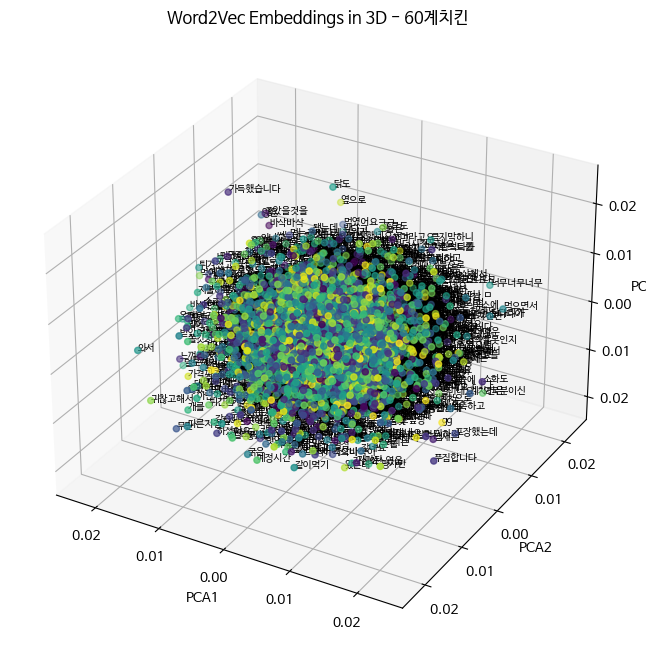

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4514 (\N{HANGUL JUNGSEONG SSANGARAEA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


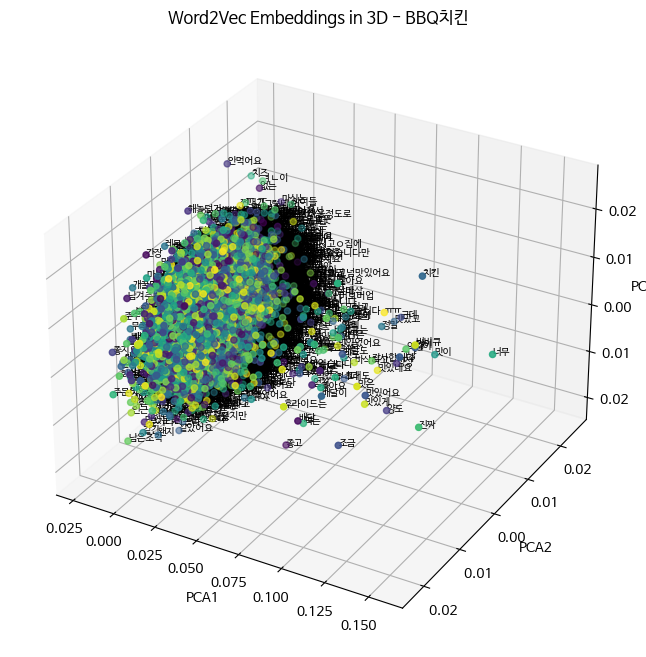

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7500 (\N{MODIFIER LETTER SMALL TURNED OPEN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7499 (\N{MODIFIER LETTER SMALL OPEN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28385 (\N{CJK UNIFIED IDEOGRAPH-6EE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

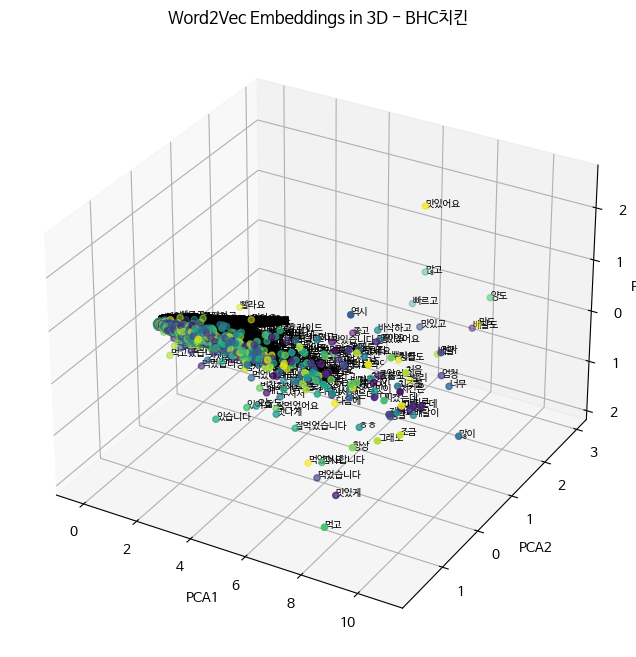

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4514 (\N{HANGUL JUNGSEONG SSANGARAEA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38622 (\N{CJK UNIFIED IDEOGRAPH-96DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21908 (\N{CJK UNIFIED IDEOGRAPH-5594}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38342 (\N{CJK UNIFIED IDEOGRAPH-95C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3

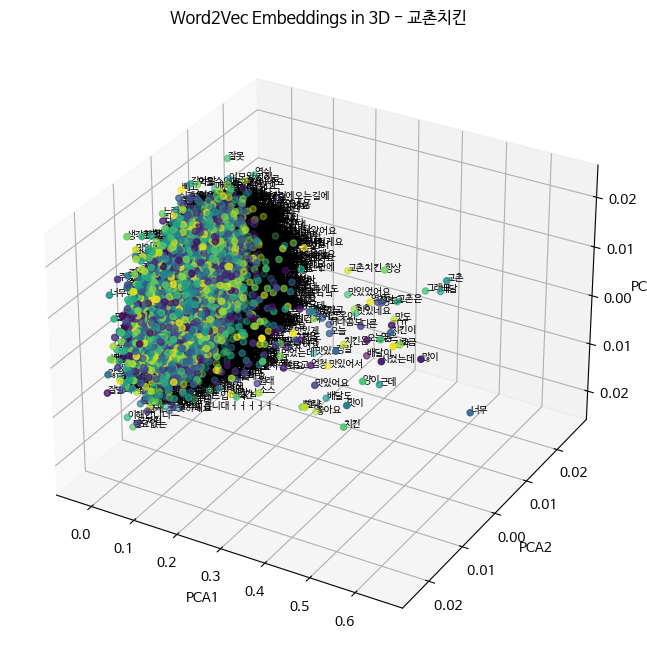

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 로드
df = pd.read_csv("/content/sample_data/브랜드비교_마포구.csv")
print(df.head())

# 각 region별로 모델 훈련 및 시각화
for region, group in df.groupby('region'):
    reviews = group['reviews'].tolist()
    sentences = [gensim.utils.simple_preprocess(review) for review in reviews if isinstance(review, str)]

    if not sentences:  # 리뷰 데이터가 없는 경우 스킵
        continue

    # Word2Vec 모델 훈련
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    # 임베딩된 단어 벡터
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # PCA를 사용하여 3차원으로 축소
    pca = PCA(n_components=3)
    vectors_reduced = pca.fit_transform(vectors)

    # matplotlib으로 3D 시각화
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = vectors_reduced[:, 0]
    y = vectors_reduced[:, 1]
    z = vectors_reduced[:, 2]

    ax.scatter(x, y, z, c=np.random.rand(len(x)), cmap='viridis', depthshade=True)

    # 각 데이터 포인트에 대한 레이블 추가
    for i, word in enumerate(words):
        ax.text(x[i], y[i], z[i], '%s' % (word), size=7, zorder=1, color='k')

    ax.set_title(f'Word2Vec Embeddings in 3D - {region}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

    # 플롯 보여주기
    plt.show()
